In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import multiprocessing 
import time
import h5py
import time
import requests

## Code used to load data

The code below was turned into a puthon script for to request data at specific redshifts and turn it into a .csv file

In [5]:
#baseUrl = 'http://www.tng-project.org/api/'
#headers = {"api-key":"f3c97208f4981e63b57bb02c7135912b"}
#
#def get(path, params=None):
#    # make HTTP GET request to path
#    r = requests.get(path, params=params, headers=headers)
#
#    # raise exception if response code is not HTTP SUCCESS (200)
#    r.raise_for_status()
#
#    if r.headers['content-type'] == 'application/json':
#        return r.json() # parse json responses automatically
#    return r
#
#r = get(baseUrl)
#
#tstart = time.time()
#
#url_z1 = "http://www.tng-project.org/api/TNG100-1/snapshots/50/subhalos/?limit=10000&offset=0"
#subhalos_z1 = get(url_z1)
#print("Elapsed Time: {:.2f}s".format(time.time() - tstart))
#
#sub_z0 = [] ## array that contains subhalo information 
#tstart = time.time()
#
#len_sub = 10000
#
#for i in range(len_sub):
#    sub_z0.append(get(subhalos_z0['results'][i]['url']))
#    print(i)
#
#print("Elapsed Time: {:.2f}s".format(time.time() - tstart))
#
#pd.set_option('display.max_columns', None)
#data_z0 = pd.DataFrame(sub_z0)
#data_z0 = data_z0.drop(['id','snap','bhmdot','cm_x', 'cm_y','cm_z','pos_x','pos_y','pos_z','sfrinhalfrad','sfrinmaxrad', 'sfrinrad',
#                  'spin_x','spin_y', 'spin_z', 'prog_snap', 'windmass', 'prog_snap', 'prog_sfid', 'desc_snap','desc_sfid','parent','grnr','primary_flag', 
#                 'related','cutouts','trees','supplementary_data','vis','meta', 'massinhalfrad','massinhalfrad_gas','massinhalfrad_dm','massinhalfrad_stars',
#                'massinhalfrad_bhs','massinmaxrad','massinmaxrad_gas','massinmaxrad_dm','massinmaxrad_stars','massinmaxrad_bhs','massinrad','gasmetallicitysfr',
#                'gasmetallicitysfrweighted','gasmetallicityhalfrad','gasmetallicitymaxrad','massinrad_gas','massinrad_dm','massinrad_stars','massinrad_bhs',
#                'starmetallicityhalfrad','starmetallicitymaxrad', 'stellarphotometricsrad', 'vel_x','vel_y','vel_z'],axis = 1)
#data_z0

## Read in data from csv files and turn into pandas dataframes

In [3]:
data_z0 = pd.read_csv("data_z0_file.csv") 
data_z0 = data_z0.iloc[:,1:] ## dropping first column that repeats row #
data_z1 = pd.read_csv("data_z1_file.csv") 
data_z1 = data_z1.iloc[:,1:]
data_z3 = pd.read_csv("data_z3_file.csv") 
data_z3 = data_z3.iloc[:,1:]
data_z5 = pd.read_csv("data_z5_file.csv") 
data_z5 = data_z5.iloc[:,1:]
data_z10 = pd.read_csv("data_z10_file.csv") 

In [4]:
data_z0 ## visualizing what the dataframe looks like

,gasmetallicity,halfmassrad,halfmassrad_gas,halfmassrad_dm,halfmassrad_stars,halfmassrad_bhs,len,len_gas,len_dm,len_stars,...,stellarphotometrics_k,stellarphotometrics_g,stellarphotometrics_r,stellarphotometrics_i,stellarphotometrics_z,stellarphotometricsmassinrad,veldisp,vmax,vmaxrad,mass_log_msun
0,0.007718,607.9660,627.3110,610.3100,47.3881,0.0,88772413,38648183,46136876,3987343,...,-28.3093,-24.96620,-25.71580,-26.07260,-26.32860,139.71200,603.8750,999.3850,327.8280,14.608138
1,0.008247,300.9590,368.5260,291.9040,17.0124,0.0,11346853,4454136,6297959,594757,...,-26.2491,-22.94760,-23.68330,-24.03390,-24.28390,21.47510,333.8930,514.7760,376.2010,13.733421
2,0.011213,78.2494,49.6454,82.6389,14.9840,0.0,2202646,114637,1420531,667477,...,-26.5456,-23.49800,-24.06920,-24.36910,-24.59750,27.32500,297.5770,461.6410,70.9815,13.057590
3,0.020788,108.9710,116.4190,113.2260,6.5303,0.0,959548,165791,614172,179584,...,-25.3858,-22.41220,-22.95520,-23.23900,-23.45370,9.19744,159.5620,291.9370,2.3082,12.699525
4,0.013132,85.2062,57.3282,89.2432,8.9908,0.0,836490,86902,606919,142668,...,-24.6734,-21.54820,-22.19050,-22.51170,-22.74450,5.13334,168.7440,294.4330,42.0984,12.681528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000,7.2077,0.0000,7.2077,0.0000,0.0,177,0,177,0,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,9.2658,16.5491,7.7825,9.120915
19996,0.000000,4.3277,0.0000,4.3580,0.0000,0.0,177,0,176,1,...,-10.9801,-8.80909,-9.28529,-9.50961,-9.62184,0.00000,10.9727,22.7740,2.2225,9.118730
19997,0.000000,2.5702,0.0000,2.5702,0.0000,0.0,177,0,177,0,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,13.5601,27.7368,2.6574,9.120915
19998,0.000000,5.8201,0.0000,5.8201,0.0000,0.0,177,0,177,0,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,10.2482,19.6274,3.7826,9.120915


## Creating and dropping a few features

In [5]:
##z0
# Picking out magnitudes to add color features
V = data_z0['stellarphotometrics_v']
G = data_z0['stellarphotometrics_g']
U = data_z0['stellarphotometrics_u']
I = data_z0['stellarphotometrics_i']
B = data_z0['stellarphotometrics_b']
R = data_z0['stellarphotometrics_r']
Z = data_z0['stellarphotometrics_z']
ug = U-G
gr = G - R
ri = R - I
iz = I - Z
data_z0['ug'] = ug
data_z0['gr'] = gr
data_z0['ri'] = ri
data_z0['iz'] = iz

# log scaling the velocity
vel_z0 = data_z0['vmax'] ## km/s
vel_z0_log = np.log10(vel_z0)
#data_z0['vel_log'] = vel_z0_log

data_z0 = data_z0.drop(['halfmassrad_bhs'], axis=1)

##z1
V = data_z1['stellarphotometrics_v']
G = data_z1['stellarphotometrics_g']
U = data_z1['stellarphotometrics_u']
I = data_z1['stellarphotometrics_i']
B = data_z1['stellarphotometrics_b']
R = data_z1['stellarphotometrics_r']
Z = data_z1['stellarphotometrics_z']
ug = U-G
gr = G - R
ri = R - I
iz = I - Z
data_z1['ug'] = ug
data_z1['gr'] = gr
data_z1['ri'] = ri
data_z1['iz'] = iz
vel_z1 = data_z0['vmax'] ## km/s
vel_z1_log = np.log10(vel_z1)
#data_z1['vel_log'] = vel_z1_log
data_z1 = data_z1.drop(['halfmassrad_bhs'], axis=1)

##z3
V = data_z3['stellarphotometrics_v']
G = data_z3['stellarphotometrics_g']
U = data_z3['stellarphotometrics_u']
I = data_z3['stellarphotometrics_i']
B = data_z3['stellarphotometrics_b']
R = data_z3['stellarphotometrics_r']
Z = data_z3['stellarphotometrics_z']
ug = U-G
gr = G - R
ri = R - I
iz = I - Z
data_z3['ug'] = ug
data_z3['gr'] = gr
data_z3['ri'] = ri
data_z3['iz'] = iz
vel_z3 = data_z0['vmax'] ## km/s
vel_z3_log = np.log10(vel_z3)
#data_z3['vel_log'] = vel_z3_log
data_z3 = data_z3.drop(['halfmassrad_bhs'], axis=1)

##z5
V = data_z5['stellarphotometrics_v']
G = data_z5['stellarphotometrics_g']
U = data_z5['stellarphotometrics_u']
I = data_z5['stellarphotometrics_i']
B = data_z5['stellarphotometrics_b']
R = data_z5['stellarphotometrics_r']
Z = data_z5['stellarphotometrics_z']
ug = U-G
gr = G - R
ri = R - I
iz = I - Z
data_z5['ug'] = ug
data_z5['gr'] = gr
data_z5['ri'] = ri
data_z5['iz'] = iz
vel_z5 = data_z0['vmax'] ## km/s
vel_z5_log = np.log10(vel_z5)
#data_z5['vel_log'] = vel_z5_log
data_z5 = data_z5.drop(['halfmassrad_bhs'], axis=1)

##z10
V = data_z10['stellarphotometrics_v']
G = data_z10['stellarphotometrics_g']
U = data_z10['stellarphotometrics_u']
I = data_z10['stellarphotometrics_i']
B = data_z10['stellarphotometrics_b']
R = data_z10['stellarphotometrics_r']
Z = data_z10['stellarphotometrics_z']
ug = U-G
gr = G - R
ri = R - I
iz = I - Z
data_z10['ug'] = ug
data_z10['gr'] = gr
data_z10['ri'] = ri
data_z10['iz'] = iz
vel_z10 = data_z0['vmax'] ## km/s
vel_z10_log = np.log10(vel_z10)
#data_z10['vel_log'] = vel_z10_log
data_z10 = data_z10.drop(['halfmassrad_bhs'], axis=1)

In [6]:
data_z0 ## looking at data after additions/removal 

,gasmetallicity,halfmassrad,halfmassrad_gas,halfmassrad_dm,halfmassrad_stars,len,len_gas,len_dm,len_stars,len_bhs,...,stellarphotometrics_z,stellarphotometricsmassinrad,veldisp,vmax,vmaxrad,mass_log_msun,ug,gr,ri,iz
0,0.007718,607.9660,627.3110,610.3100,47.3881,88772413,38648183,46136876,3987343,11,...,-26.32860,139.71200,603.8750,999.3850,327.8280,14.608138,0.86290,0.74960,0.35680,0.25600
1,0.008247,300.9590,368.5260,291.9040,17.0124,11346853,4454136,6297959,594757,1,...,-24.28390,21.47510,333.8930,514.7760,376.2010,13.733421,0.83340,0.73570,0.35060,0.25000
2,0.011213,78.2494,49.6454,82.6389,14.9840,2202646,114637,1420531,667477,1,...,-24.59750,27.32500,297.5770,461.6410,70.9815,13.057590,0.43020,0.57120,0.29990,0.22840
3,0.020788,108.9710,116.4190,113.2260,6.5303,959548,165791,614172,179584,1,...,-23.45370,9.19744,159.5620,291.9370,2.3082,12.699525,0.44140,0.54300,0.28380,0.21470
4,0.013132,85.2062,57.3282,89.2432,8.9908,836490,86902,606919,142668,1,...,-22.74450,5.13334,168.7440,294.4330,42.0984,12.681528,0.59880,0.64230,0.32120,0.23280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000,7.2077,0.0000,7.2077,0.0000,177,0,177,0,0,...,0.00000,0.00000,9.2658,16.5491,7.7825,9.120915,0.00000,0.00000,0.00000,0.00000
19996,0.000000,4.3277,0.0000,4.3580,0.0000,177,0,176,1,0,...,-9.62184,0.00000,10.9727,22.7740,2.2225,9.118730,0.34413,0.47620,0.22432,0.11223
19997,0.000000,2.5702,0.0000,2.5702,0.0000,177,0,177,0,0,...,0.00000,0.00000,13.5601,27.7368,2.6574,9.120915,0.00000,0.00000,0.00000,0.00000
19998,0.000000,5.8201,0.0000,5.8201,0.0000,177,0,177,0,0,...,0.00000,0.00000,10.2482,19.6274,3.7826,9.120915,0.00000,0.00000,0.00000,0.00000


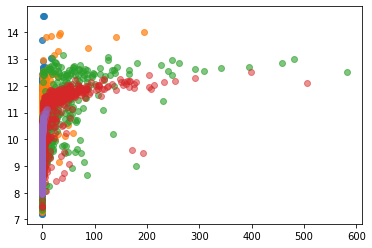

In [7]:
plt.plot(data_z0['sfr'],data_z0['mass_log_msun'], 'o',alpha=0.8)
plt.plot(data_z1['sfr'],data_z1['mass_log_msun'], 'o',alpha=0.7)
plt.plot(data_z3['sfr'],data_z3['mass_log_msun'], 'o',alpha=0.6)
plt.plot(data_z5['sfr'],data_z5['mass_log_msun'], 'o',alpha=0.5)
plt.plot(data_z10['sfr'],data_z10['mass_log_msun'], 'o',alpha=0.4)

## Separating out Star Forming or not

In [8]:
sfr_bool_z0 = []

## using for loop to iterate over data and calculate if SFR or not
for i in range(20000):
    if (data_z0['sfr'][i]) > 0:
        sfr_bool_z0 += [1]
    else:
        sfr_bool_z0 += [0]
        
data_z0 = data_z0.drop('sfr',1) ## dropping the SFR from the data 

## doing the same for the rest of the data
sfr_bool_z1 = []
for i in range(20000):
    if (data_z1['sfr'][i]) > 0:
        sfr_bool_z1 += [1]
    else:
        sfr_bool_z1 += [0]
data_z1 = data_z1.drop('sfr',1)

sfr_bool_z3 = []
for i in range(20000):
    if (data_z3['sfr'][i]) > 0:
        sfr_bool_z3 += [1]
    else:
        sfr_bool_z3 += [0]
data_z3 = data_z3.drop('sfr',1)

sfr_bool_z5 = []
for i in range(20000):
    if (data_z5['sfr'][i]) > 0:
        sfr_bool_z5 += [1]
    else:
        sfr_bool_z5 += [0]
data_z5 = data_z5.drop('sfr',1)

sfr_bool_z10 = []
for i in range(20000):
    if (data_z10['sfr'][i]) > 0:
        sfr_bool_z10 += [1]
    else:
        sfr_bool_z10 += [0]
data_z10 = data_z10.drop('sfr',1)

## Using RF to see what features are important for Star Formation Rate at each redshift

### z0

In [9]:
from sklearn.model_selection import train_test_split

X_z0 = data_z0
y_z0 = sfr_bool_z0

X_train_z0, X_test_z0, y_train_z0, y_test_z0 = train_test_split(X_z0, y_z0, random_state=0)

In [10]:
from sklearn.ensemble import RandomForestClassifier

tstart = time.time()

model_z0 = RandomForestClassifier(n_estimators=100, oob_score=True)
model_z0.fit(X_train_z0, y_train_z0)
print(model_z0.score(X_test_z0, y_test_z0))
print(model_z0.oob_score_)
print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

0.9996
0.9990666666666667
Elapsed Time: 0.97s


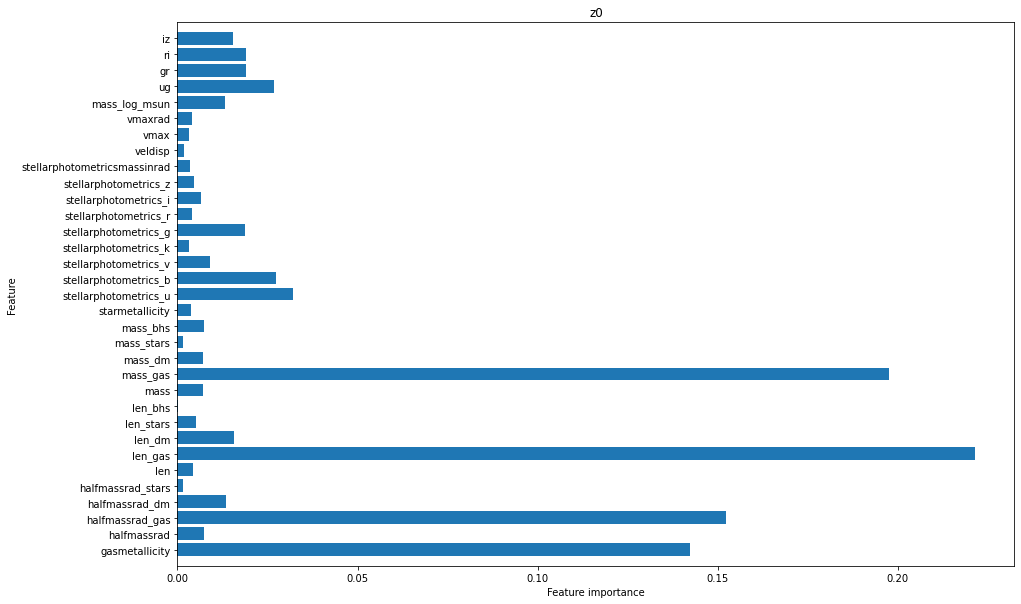

In [12]:
from sklearn.inspection import permutation_importance

## feature importance plot
def plot_feature_importances(model):
    n_features = X_test_z0.shape[1]
    plt.barh(np.arange(n_features), model_z0.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), (data_z0.head()))
    plt.title("z0")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.gcf().set_size_inches(15, 10)
    
plot_feature_importances(model_z0)

### z1

In [13]:
## split data
X_z1 = data_z1
y_z1 = sfr_bool_z1

X_train_z1, X_test_z1, y_train_z1, y_test_z1 = train_test_split(X_z1, y_z1, random_state=0)

##build model 
tstart = time.time()

model_z1 = RandomForestClassifier(n_estimators=100, oob_score=True)
model_z1.fit(X_train_z1, y_train_z1)
print(model_z1.score(X_test_z1, y_test_z1))
print(model_z1.oob_score_)
print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

0.9994
0.9982
Elapsed Time: 1.21s


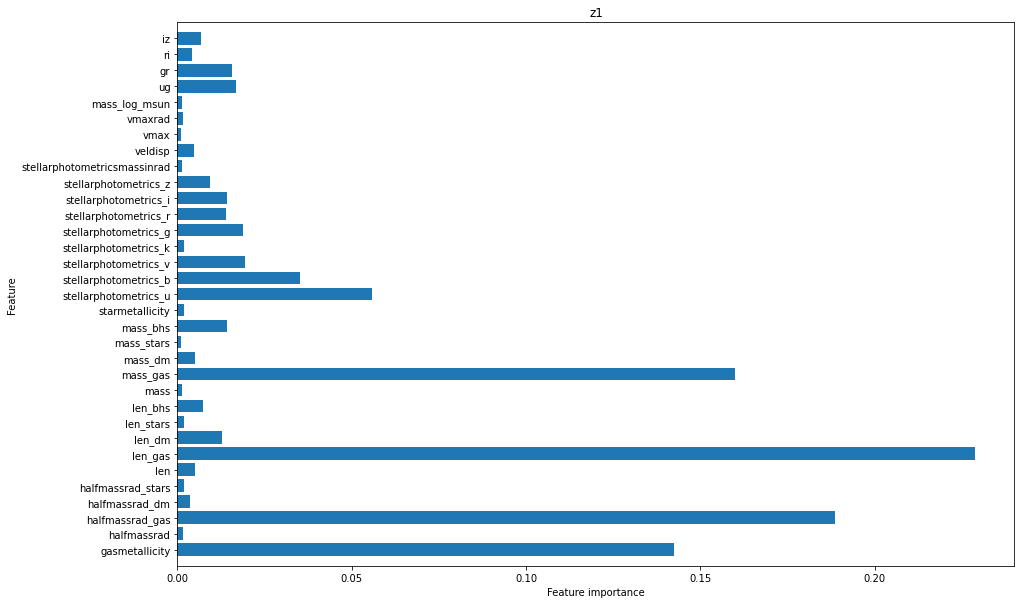

In [14]:
## feature importance plot
def plot_feature_importances(model):
    n_features = X_test_z1.shape[1]
    plt.barh(np.arange(n_features), model_z1.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), (data_z1.head()))
    plt.title("z1")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.gcf().set_size_inches(15, 10)
    
plot_feature_importances(model_z1)

### z3

In [15]:
## split data
X_z3 = data_z3
y_z3 = sfr_bool_z3

X_train_z3, X_test_z3, y_train_z3, y_test_z3 = train_test_split(X_z3, y_z3, random_state=0)

##build model 
tstart = time.time()

model_z3 = RandomForestClassifier(n_estimators=100, oob_score=True)
model_z3.fit(X_train_z3, y_train_z3)
print(model_z3.score(X_test_z3, y_test_z3))
print(model_z3.oob_score_)
print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

0.9826
0.9837333333333333
Elapsed Time: 2.00s


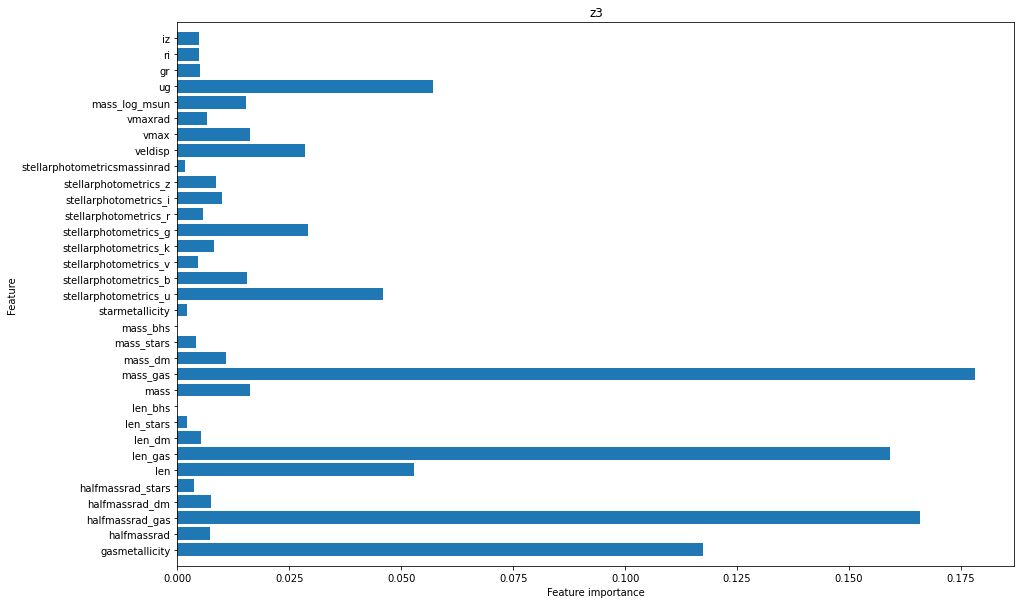

In [16]:
def plot_feature_importances(model):
    n_features = X_test_z3.shape[1]
    plt.barh(np.arange(n_features), model_z3.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), (data_z3.head()))
    plt.title("z3")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.gcf().set_size_inches(15, 10)
    
plot_feature_importances(model_z3)

### z5

In [17]:
## split data
X_z5 = data_z5
y_z5 = sfr_bool_z5

X_train_z5, X_test_z5, y_train_z5, y_test_z5 = train_test_split(X_z5, y_z5, random_state=0)

##build model 
tstart = time.time()

model_z5 = RandomForestClassifier(n_estimators=100, oob_score=True)
model_z5.fit(X_train_z5, y_train_z5)
print(model_z5.score(X_test_z5, y_test_z5))
print(model_z5.oob_score_)
print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

0.9386
0.9341333333333334
Elapsed Time: 2.85s


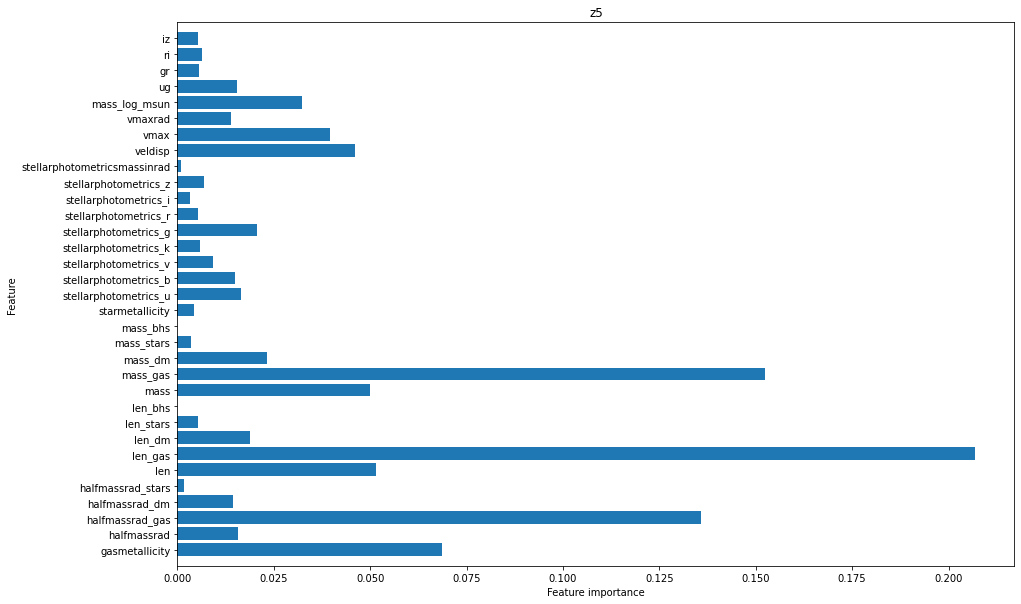

In [18]:
def plot_feature_importances(model):
    n_features = X_test_z5.shape[1]
    plt.barh(np.arange(n_features), model_z5.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), (data_z5.head()))
    plt.title("z5")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.gcf().set_size_inches(15, 10)
    
plot_feature_importances(model_z5)

### z10

In [19]:
## split data
X_z10 = data_z10
y_z10 = sfr_bool_z10

X_train_z10, X_test_z10, y_train_z10, y_test_z10 = train_test_split(X_z10, y_z10, random_state=0)

##build model 
tstart = time.time()

model_z10 = RandomForestClassifier(n_estimators=100, oob_score=True)
model_z10.fit(X_train_z10, y_train_z10)
print(model_z10.score(X_test_z10, y_test_z10))
print(model_z10.oob_score_)
print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

0.9884
0.9854666666666667
Elapsed Time: 3.01s


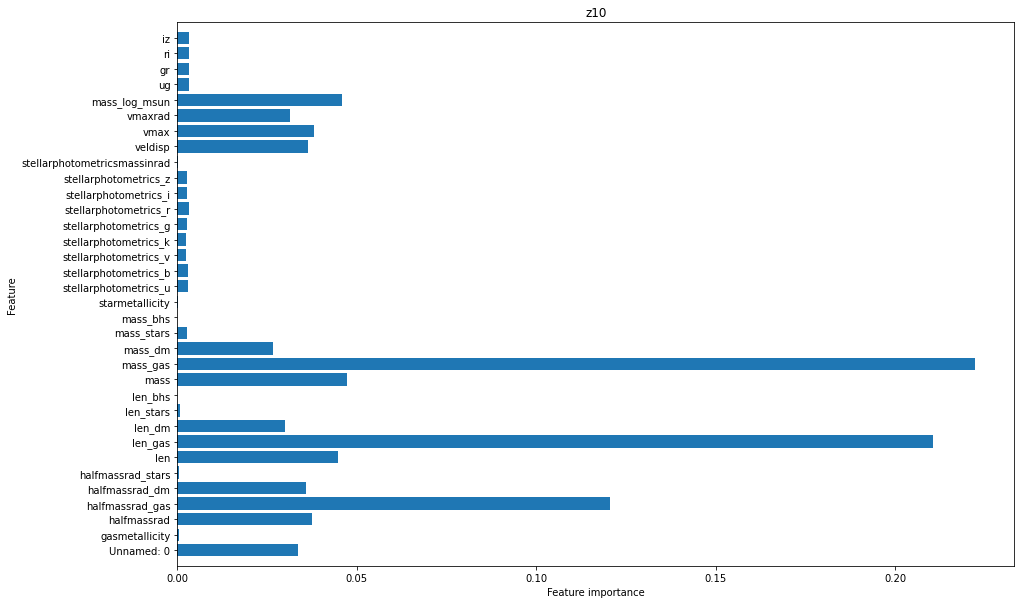

In [20]:
def plot_feature_importances(model):
    n_features = X_test_z10.shape[1]
    plt.barh(np.arange(n_features), model_z10.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), (data_z10.head()))
    plt.title("z10")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.gcf().set_size_inches(15, 10)
    
plot_feature_importances(model_z10)

In [48]:
#Initialize sum     
sum_z0 = 0  
     
#Loop through the array to calculate sum of elements    
for i in range(len(sfr_bool_z0)): 
    sum_z0 += sfr_bool_z0[i] 
     
print("Sum SFR z0: ", sum_z0)   
    
sum_z1 = 0    
for i in range(len(sfr_bool_z1)): 
    sum_z1 += sfr_bool_z1[i] 
print("Sum SFR z1: ", sum_z1)   

sum_z3 = 0    
for i in range(len(sfr_bool_z3)): 
    sum_z3 += sfr_bool_z3[i] 
print("Sum SFR z3: ", sum_z3)  

sum_z5 = 0    
for i in range(len(sfr_bool_z5)): 
    sum_z5 += sfr_bool_z5[i] 
print("Sum SFR z5: ", sum_z5)   

sum_z10 = 0    
for i in range(len(sfr_bool_z10)): 
    sum_z10 += sfr_bool_z10[i] 
print("Sum SFR z10: ", sum_z10)   

Sum SFR z0:  192
Sum SFR z1:  551
Sum SFR z3:  2318
Sum SFR z5:  6756
Sum SFR z10:  19430


## Reruning ML with more relistic inputs

Some of the features in the data table are extremely difficult to directly measure. Below I remove a few features from the table to see how well RF predicts SFR with a more restricted amount of features 

In [21]:
data_z0 

,gasmetallicity,halfmassrad,halfmassrad_gas,halfmassrad_dm,halfmassrad_stars,len,len_gas,len_dm,len_stars,len_bhs,...,stellarphotometrics_z,stellarphotometricsmassinrad,veldisp,vmax,vmaxrad,mass_log_msun,ug,gr,ri,iz
0,0.007718,607.9660,627.3110,610.3100,47.3881,88772413,38648183,46136876,3987343,11,...,-26.32860,139.71200,603.8750,999.3850,327.8280,14.608138,0.86290,0.74960,0.35680,0.25600
1,0.008247,300.9590,368.5260,291.9040,17.0124,11346853,4454136,6297959,594757,1,...,-24.28390,21.47510,333.8930,514.7760,376.2010,13.733421,0.83340,0.73570,0.35060,0.25000
2,0.011213,78.2494,49.6454,82.6389,14.9840,2202646,114637,1420531,667477,1,...,-24.59750,27.32500,297.5770,461.6410,70.9815,13.057590,0.43020,0.57120,0.29990,0.22840
3,0.020788,108.9710,116.4190,113.2260,6.5303,959548,165791,614172,179584,1,...,-23.45370,9.19744,159.5620,291.9370,2.3082,12.699525,0.44140,0.54300,0.28380,0.21470
4,0.013132,85.2062,57.3282,89.2432,8.9908,836490,86902,606919,142668,1,...,-22.74450,5.13334,168.7440,294.4330,42.0984,12.681528,0.59880,0.64230,0.32120,0.23280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000,7.2077,0.0000,7.2077,0.0000,177,0,177,0,0,...,0.00000,0.00000,9.2658,16.5491,7.7825,9.120915,0.00000,0.00000,0.00000,0.00000
19996,0.000000,4.3277,0.0000,4.3580,0.0000,177,0,176,1,0,...,-9.62184,0.00000,10.9727,22.7740,2.2225,9.118730,0.34413,0.47620,0.22432,0.11223
19997,0.000000,2.5702,0.0000,2.5702,0.0000,177,0,177,0,0,...,0.00000,0.00000,13.5601,27.7368,2.6574,9.120915,0.00000,0.00000,0.00000,0.00000
19998,0.000000,5.8201,0.0000,5.8201,0.0000,177,0,177,0,0,...,0.00000,0.00000,10.2482,19.6274,3.7826,9.120915,0.00000,0.00000,0.00000,0.00000


In [30]:
data_z0 = data_z0.drop(['mass','halfmassrad','halfmassrad_gas','halfmassrad_dm',
                        'halfmassrad_stars','len_dm','len_stars',
                        'len_bhs','mass','mass_gas','mass_stars','mass_bhs','mass_dm',
                        'veldisp','vmaxrad', 'mass_log_msun'], axis=1)
data_z1 = data_z1.drop(['mass', 'halfmassrad','halfmassrad_gas','halfmassrad_dm',
                        'halfmassrad_stars','len_dm','len_stars',
                        'len_bhs','mass','mass_gas','mass_stars','mass_bhs','mass_dm',
                        'veldisp','vmaxrad', 'mass_log_msun'], axis=1)
data_z3 = data_z3.drop(['mass', 'halfmassrad','halfmassrad_gas','halfmassrad_dm',
                        'halfmassrad_stars','len_dm','len_stars',
                        'len_bhs','mass','mass_gas','mass_stars','mass_bhs','mass_dm',
                        'veldisp','vmaxrad', 'mass_log_msun'], axis=1)
data_z5 = data_z5.drop(['mass', 'halfmassrad','halfmassrad_gas','halfmassrad_dm',
                        'halfmassrad_stars','len_dm','len_stars',
                        'len_bhs','mass','mass_gas','mass_stars','mass_bhs','mass_dm',
                        'veldisp','vmaxrad', 'mass_log_msun'], axis=1)
data_z10 = data_z10.drop(['mass', 'halfmassrad','halfmassrad_gas','halfmassrad_dm',
                        'halfmassrad_stars','len_dm','len_stars',
                        'len_bhs','mass','mass_gas','mass_stars','mass_bhs','mass_dm',
                        'veldisp','vmaxrad', 'mass_log_msun'], axis=1)

KeyError: "['mass' 'halfmassrad' 'halfmassrad_gas' 'halfmassrad_dm'\n 'halfmassrad_stars' 'len_dm' 'len_stars' 'len_bhs' 'mass' 'mass_gas'\n 'mass_stars' 'mass_bhs' 'mass_dm' 'veldisp' 'vmaxrad' 'mass_log_msun'] not found in axis"

In [45]:
from sklearn.model_selection import train_test_split

X_z0 = data_z0
y_z0 = sfr_bool_z0

X_train_z0, X_test_z0, y_train_z0, y_test_z0 = train_test_split(X_z0, y_z0, random_state=0)

from sklearn.ensemble import RandomForestClassifier

tstart = time.time()

model_z0 = RandomForestClassifier(n_estimators=100, oob_score=True)
model_z0.fit(X_train_z0, y_train_z0)
print(model_z0.score(X_test_z0, y_test_z0))
print(model_z0.oob_score_)
print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

0.9996
0.9991333333333333
Elapsed Time: 0.96s


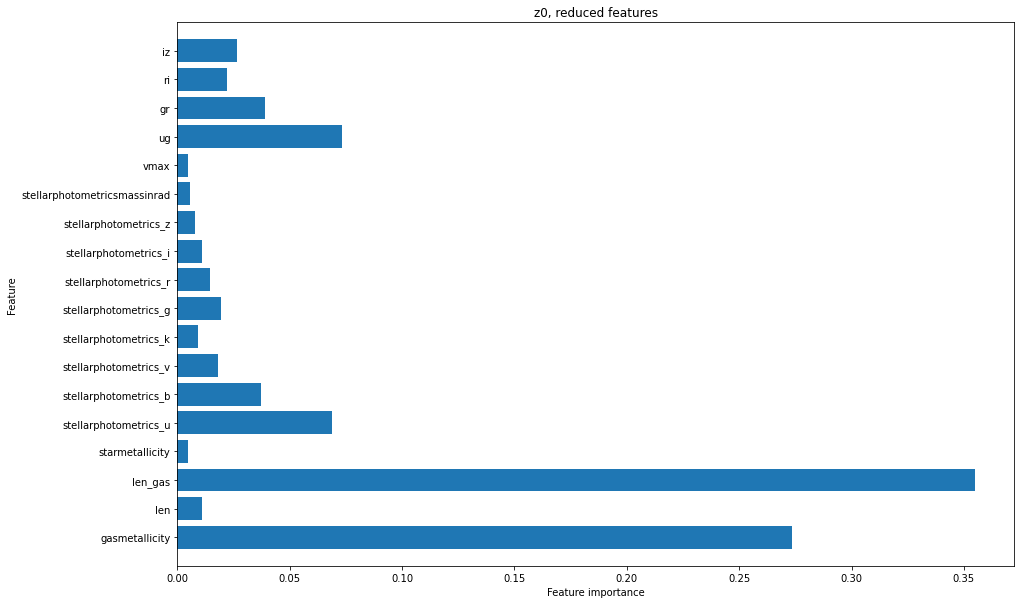

In [47]:
from sklearn.inspection import permutation_importance

## feature importance plot
def plot_feature_importances(model):
    n_features = X_test_z0.shape[1]
    plt.barh(np.arange(n_features), model_z0.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), (data_z0.head()))
    plt.title("z0, reduced features")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.gcf().set_size_inches(15, 10)
    
plot_feature_importances(model_z0)

In [25]:
## split data
X_z1 = data_z1
y_z1 = sfr_bool_z1

X_train_z1, X_test_z1, y_train_z1, y_test_z1 = train_test_split(X_z1, y_z1, random_state=0)

##build model 
tstart = time.time()

model_z1 = RandomForestClassifier(n_estimators=100, oob_score=True)
model_z1.fit(X_train_z1, y_train_z1)
print(model_z1.score(X_test_z1, y_test_z1))
print(model_z1.oob_score_)
print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

0.9994
0.9978
Elapsed Time: 1.13s


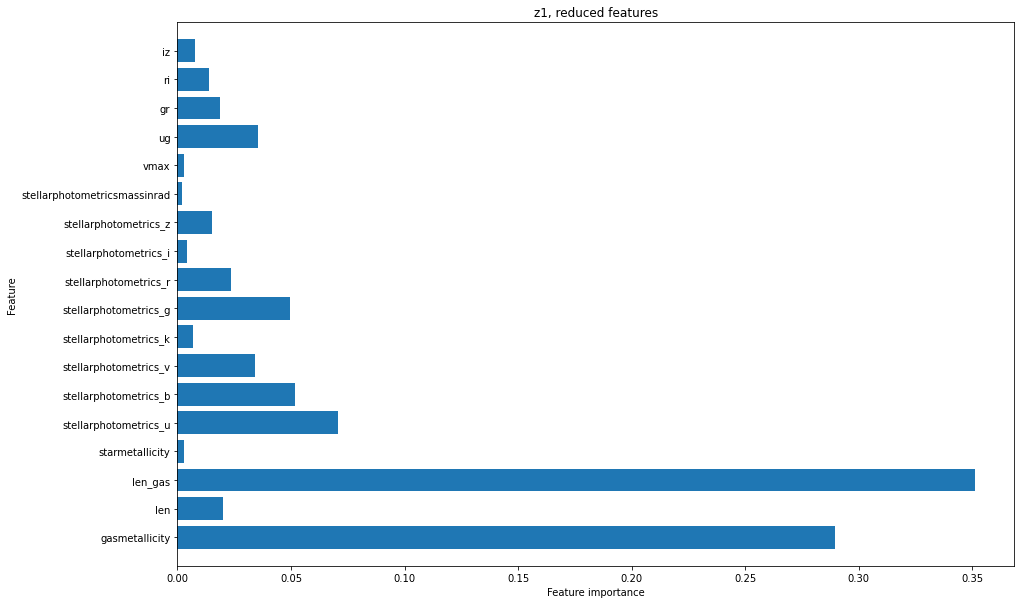

In [48]:
## feature importance plot
def plot_feature_importances(model):
    n_features = X_test_z1.shape[1]
    plt.barh(np.arange(n_features), model_z1.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), (data_z1.head()))
    plt.title("z1, reduced features")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.gcf().set_size_inches(15, 10)
    
plot_feature_importances(model_z1)

In [34]:
## split data
X_z3 = data_z3
y_z3 = sfr_bool_z3

X_train_z3, X_test_z3, y_train_z3, y_test_z3 = train_test_split(X_z3, y_z3, random_state=0)

##build model 
tstart = time.time()

model_z3 = RandomForestClassifier(n_estimators=100, oob_score=True)
model_z3.fit(X_train_z3, y_train_z3)
print(model_z3.score(X_test_z3, y_test_z3))
print(model_z3.oob_score_)
print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

0.9788
0.9805333333333334
Elapsed Time: 1.86s


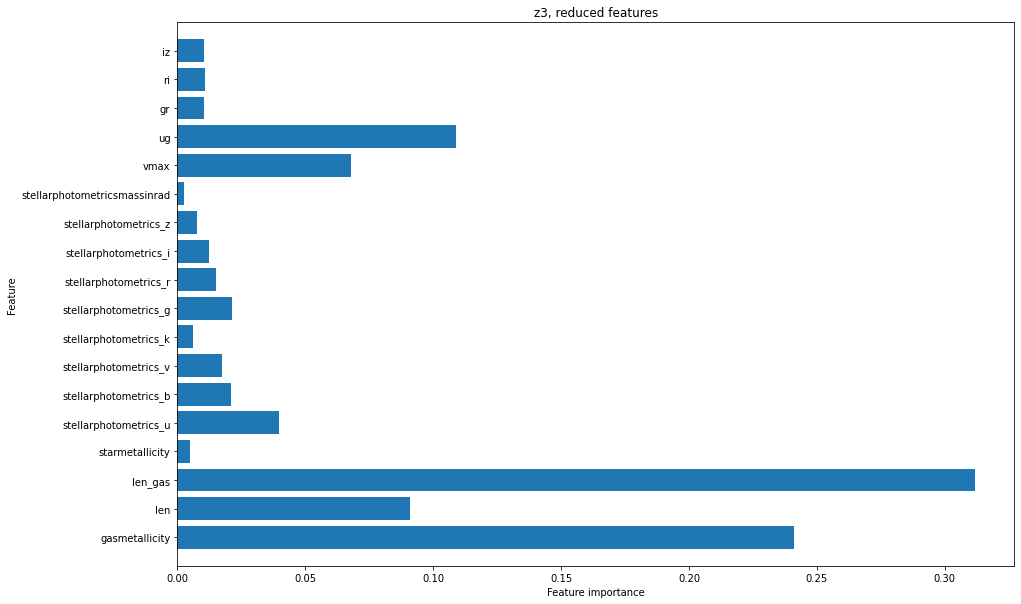

In [49]:
def plot_feature_importances(model):
    n_features = X_test_z3.shape[1]
    plt.barh(np.arange(n_features), model_z3.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), (data_z3.head()))
    plt.title("z3, reduced features")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.gcf().set_size_inches(15, 10)
    
plot_feature_importances(model_z3)

In [37]:
## split data
X_z5 = data_z5
y_z5 = sfr_bool_z5

X_train_z5, X_test_z5, y_train_z5, y_test_z5 = train_test_split(X_z5, y_z5, random_state=0)

##build model 
tstart = time.time()

model_z5 = RandomForestClassifier(n_estimators=100, oob_score=True)
model_z5.fit(X_train_z5, y_train_z5)
print(model_z5.score(X_test_z5, y_test_z5))
print(model_z5.oob_score_)
print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

0.9268
0.9256666666666666
Elapsed Time: 2.47s


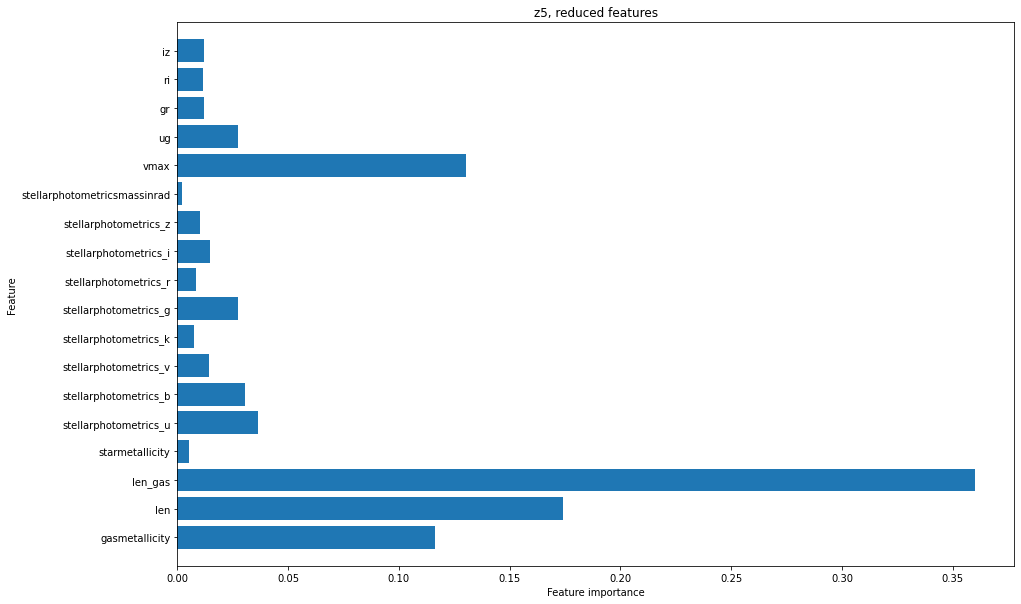

In [50]:
def plot_feature_importances(model):
    n_features = X_test_z5.shape[1]
    plt.barh(np.arange(n_features), model_z5.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), (data_z5.head()))
    plt.title("z5, reduced features")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.gcf().set_size_inches(15, 10)
    
plot_feature_importances(model_z5)

In [39]:
## split data
X_z10 = data_z10
y_z10 = sfr_bool_z10

X_train_z10, X_test_z10, y_train_z10, y_test_z10 = train_test_split(X_z10, y_z10, random_state=0)

##build model 
tstart = time.time()

model_z10 = RandomForestClassifier(n_estimators=100, oob_score=True)
model_z10.fit(X_train_z10, y_train_z10)
print(model_z10.score(X_test_z10, y_test_z10))
print(model_z10.oob_score_)
print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

0.987
0.984
Elapsed Time: 2.33s


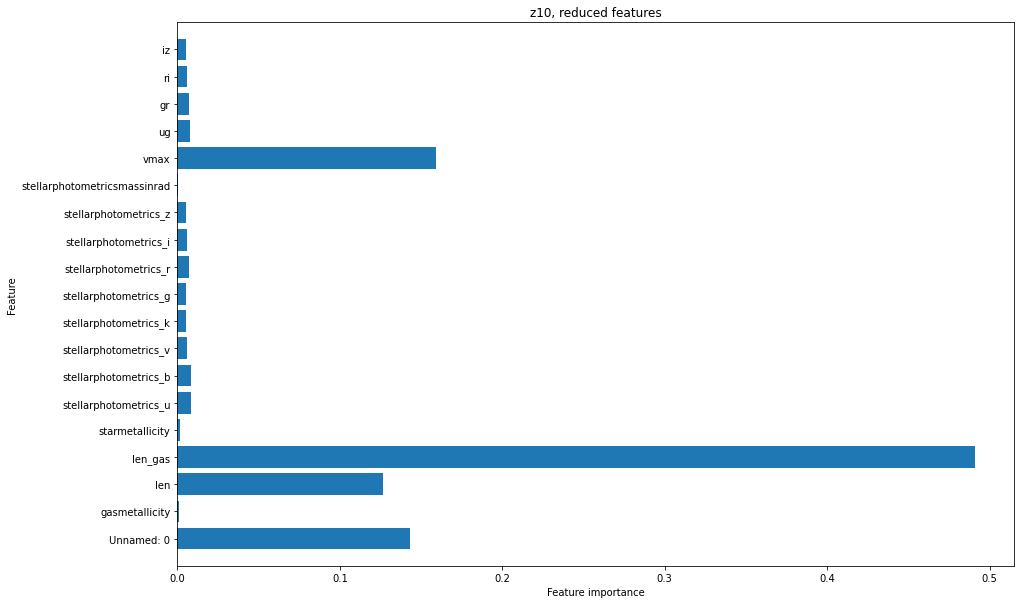

In [51]:
def plot_feature_importances(model):
    n_features = X_test_z10.shape[1]
    plt.barh(np.arange(n_features), model_z10.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), (data_z10.head()))
    plt.title("z10, reduced features")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.gcf().set_size_inches(15, 10)
    
plot_feature_importances(model_z10)